In [1]:
#import recover_data_lake as rdl
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.metrics import explained_variance_score, r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import numpy as np

In [3]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def w_corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

In [4]:
round_names = {1: 'Calibration', 2: 'Diversity', 3: 'SMO Search 1', 4: 'SMO Search 2', 5: 'SMO Search 3'}

def get_round_name(round_number):
    return round_names[round_number]



In [5]:
# Experiments
#one_exp = rdl.get_inhouse_data(project='oncology', experiment_round=1, option=2)
#two_exp = rdl.get_inhouse_data(project='oncology', experiment_round=2, option=2)
#three_exp = rdl.get_inhouse_data(project='oncology', experiment_round=3, option=2)
data_folder = '/home/jupyter-jake/shared_data/collaborations/scripps_oncology/'
one_exp = pd.read_csv(data_folder + 'round1_results.csv')
two_exp = pd.read_csv(data_folder + 'round2_results.csv')
three_exp = pd.read_csv(data_folder + 'round3_results.csv')
four_exp = pd.read_csv(data_folder + 'round4_results.csv')
five_exp = pd.read_csv(data_folder + 'round5_results.csv')

In [6]:
# Predictions
one_pred = pd.read_csv(data_folder + 'combos_with_predictions_round1.csv')
two_pred = pd.read_csv(data_folder + 'combos_with_predictions_round2.csv')
three_pred = pd.read_csv(data_folder + 'combos_with_predictions_round3.csv')
four_pred = pd.read_csv(data_folder + 'combos_with_predictions_round4.csv')
five_pred = pd.read_csv(data_folder + 'combos_with_predictions_round5.csv')

columns = ['relation_id_drug_column', 'relation_id_drug_row',
           'preds_mean', 'preds_std', 'score']
columns_one = ['new_drug_id', 'replacement_new_drug_id', 'studied_drug_id',
               'predicted_bliss_max_mean', 'predicted_bliss_max_std',
               'predicted_bliss_max_mean_gnn', 'predicted_bliss_max_std_gnn',
               'predicted_bliss_max_mean_baseline', 'predicted_bliss_max_std_baseline']

one_pred = one_pred[columns_one]
two_pred = two_pred[columns]
three_pred = three_pred[columns]
four_pred = four_pred[columns]
five_pred = five_pred[columns]

In [7]:
# Round 1 (experiment + prediction)
# At this stage we were still using several models including GNN
# Need to confirm with MILA what each prediction means (GNN, Baseline, what about the one without underscore?)

one = one_exp.merge(one_pred, left_on=['drug_col_relation_id', 'drug_row_relation_id'],
                    right_on=['new_drug_id', 'studied_drug_id'])
one_replacements = one_exp.merge(one_pred, left_on=['drug_col_relation_id', 'drug_row_relation_id'],
                             right_on=['replacement_new_drug_id', 'studied_drug_id'])
one = pd.concat([one, one_replacements]).reset_index(drop=True)
one = one[['drug_col_relation_id' ,'drug_row_relation_id',
           'synergy_bliss_max', 'cell_line_name',
           'predicted_bliss_max_mean', 'predicted_bliss_max_std',
           'predicted_bliss_max_mean_gnn', 'predicted_bliss_max_std_gnn',
           'predicted_bliss_max_mean_baseline', 'predicted_bliss_max_std_baseline']]

one

,drug_col_relation_id,drug_row_relation_id,synergy_bliss_max,cell_line_name,predicted_bliss_max_mean,predicted_bliss_max_std,predicted_bliss_max_mean_gnn,predicted_bliss_max_std_gnn,predicted_bliss_max_mean_baseline,predicted_bliss_max_std_baseline
0,RE-MOL-0001495947,RE-MOL-0000575642,0.0,MCF7,32.175810,3.475047,32.175810,3.475047,29.405624,8.240949
1,RE-MOL-0001140916,RE-MOL-0000435288,7.2,MCF7,27.042995,6.442581,27.042995,6.442581,27.479221,8.949006
2,RE-MOL-0000584536,RE-MOL-0000006951,18.4,MCF7,19.805845,2.343556,19.805845,2.343556,15.834754,3.376568
3,RE-MOL-0001495720,RE-MOL-0000003872,14.2,MCF7,17.392440,1.989863,17.392440,1.989863,16.415712,2.662427
4,RE-MOL-0000295701,RE-MOL-0000061053,25.9,MCF7,42.697880,5.554634,36.102478,12.174680,42.697880,5.554634
5,RE-MOL-0000056173,RE-MOL-0000123129,19.0,MCF7,28.142609,2.111711,30.091614,2.223107,28.142609,2.111711
6,RE-MOL-0001376287,RE-MOL-0000575645,3.9,MCF7,17.925869,2.344853,16.367638,5.799217,17.925869,2.344853
7,RE-MOL-0000000818,RE-MOL-0000575386,4.9,MCF7,16.970253,9.672385,18.211044,4.261859,16.970253,9.672385
8,RE-MOL-0000369026,RE-MOL-0000042933,8.1,MCF7,16.297860,3.521340,10.484366,3.094523,16.297860,3.521340
9,RE-MOL-0000000882,RE-MOL-0000009357,16.0,MCF7,3.568019,2.670206,7.596976,1.292416,3.568019,2.670206


In [8]:
# Round 2 (experiment + prediction)

two = two_exp.merge(two_pred, left_on=['drug_col_relation_id', 'drug_row_relation_id'],
                    right_on=['relation_id_drug_column', 'relation_id_drug_row'])
two = two[['drug_col_relation_id' ,'drug_row_relation_id',
           'synergy_bliss_max', 'cell_line_name',
           'preds_mean', 'preds_std', 'score']]

two

,drug_col_relation_id,drug_row_relation_id,synergy_bliss_max,cell_line_name,preds_mean,preds_std,score
0,RE-MOL-0000463148,RE-MOL-0000575642,2.0,MCF7,20.263023,8.022212,28.285236
1,RE-MOL-0001495681,RE-MOL-0000575645,13.9,MCF7,17.136248,7.681704,24.817952
2,RE-MOL-0000883550,RE-MOL-0000012837,40.6,MCF7,10.579336,7.966551,18.545887
3,RE-MOL-0000516751,RE-MOL-0000123129,6.5,MCF7,12.378151,5.806563,18.184714
4,RE-MOL-0001319071,RE-MOL-0000435288,6.6,MCF7,13.143919,3.897417,17.041336
5,RE-MOL-0000071121,RE-MOL-0000372549,6.8,MCF7,12.936139,3.038596,15.974736
6,RE-MOL-0001317309,RE-MOL-0000584456,23.7,MCF7,12.503742,2.832405,15.336147
7,RE-MOL-0000601050,RE-MOL-0000006951,6.0,MCF7,11.235743,3.670753,14.906496
8,RE-MOL-0001139442,RE-MOL-0000535535,15.8,MCF7,10.959262,3.489522,14.448784
9,RE-MOL-0000401940,RE-MOL-0000408487,-1.9,MCF7,11.486040,2.463049,13.949089


In [9]:
# Round 3

three = three_exp.merge(three_pred, left_on=['drug_col_relation_id', 'drug_row_relation_id'],
                    right_on=['relation_id_drug_column', 'relation_id_drug_row'])
three = three[['drug_col_relation_id' ,'drug_row_relation_id',
           'synergy_bliss_max', 'cell_line_name',
           'preds_mean', 'preds_std', 'score']]

three

,drug_col_relation_id,drug_row_relation_id,synergy_bliss_max,cell_line_name,preds_mean,preds_std,score
0,RE-MOL-0000883550,RE-MOL-0000575645,14.8,MCF7,19.470671,8.109092,27.579762
1,RE-MOL-0000883550,RE-MOL-0000584456,17.1,MCF7,19.036755,6.508617,25.545371
2,RE-MOL-0000883550,RE-MOL-0000575386,29.8,MCF7,16.359913,9.162129,25.522042
3,RE-MOL-0000883550,RE-MOL-0000372549,14.3,MCF7,17.040564,6.310264,23.350827
4,RE-MOL-0001495947,RE-MOL-0000123129,8.1,MCF7,16.811619,6.020777,22.832396
5,RE-MOL-0000883550,RE-MOL-0000435288,21.3,MCF7,16.598566,6.060767,22.659333
6,RE-MOL-0001317309,RE-MOL-0000575645,6.2,MCF7,17.042698,5.605177,22.647875
7,RE-MOL-0001140916,RE-MOL-0000575645,6.2,MCF7,15.753962,6.862351,22.616313
8,RE-MOL-0001317309,RE-MOL-0000012837,8.7,MCF7,13.991817,8.379540,22.371357
9,RE-MOL-0001140916,RE-MOL-0000575642,24.1,MCF7,15.764807,6.448794,22.213601


In [10]:
# Round 4

four = four_exp.merge(four_pred, left_on=['drug_col_relation_id', 'drug_row_relation_id'],
                    right_on=['relation_id_drug_column', 'relation_id_drug_row'])
four = four[['drug_col_relation_id' ,'drug_row_relation_id',
           'synergy_bliss_max', 'cell_line_name',
           'preds_mean', 'preds_std', 'score']]

four

,drug_col_relation_id,drug_row_relation_id,synergy_bliss_max,cell_line_name,preds_mean,preds_std,score
0,RE-MOL-0000463148,RE-MOL-0000003872,1.0,MCF7,20.902773,6.744092,27.646865
1,RE-MOL-0001495947,RE-MOL-0000435288,65.8,MCF7,21.010664,6.588467,27.599131
2,RE-MOL-0000463148,RE-MOL-0000075835,8.8,MCF7,17.474543,6.638723,24.113265
3,RE-MOL-0000463148,RE-MOL-0000123129,5.1,MCF7,17.809351,6.224913,24.034264
4,RE-MOL-0000463148,RE-MOL-0000584456,16.1,MCF7,17.639606,6.294565,23.934171
5,RE-MOL-0000000882,RE-MOL-0000435288,39.8,MCF7,17.750021,5.972308,23.722329
6,RE-MOL-0001495947,RE-MOL-0000075835,1.9,MCF7,17.948383,5.539052,23.487435
7,RE-MOL-0000001178,RE-MOL-0000435288,50.2,MCF7,17.274038,6.018642,23.292681
8,RE-MOL-0001139442,RE-MOL-0000435288,16.6,MCF7,17.675631,5.254791,22.930422
9,RE-MOL-0000023607,RE-MOL-0000435288,7.8,MCF7,18.090565,4.618172,22.708736


In [11]:
# Round 5

five = five_exp.merge(five_pred, left_on=['drug_col_relation_id', 'drug_row_relation_id'],
                    right_on=['relation_id_drug_column', 'relation_id_drug_row'])
five = five[['drug_col_relation_id' ,'drug_row_relation_id',
           'synergy_bliss_max', 'cell_line_name',
           'preds_mean', 'preds_std', 'score']]

five

,drug_col_relation_id,drug_row_relation_id,synergy_bliss_max,cell_line_name,preds_mean,preds_std,score
0,RE-MOL-0000000882,RE-MOL-0000535535,17.8,MCF7,30.797882,9.878811,40.676693
1,RE-MOL-0001495681,RE-MOL-0000535535,11.2,MCF7,25.821669,11.819682,37.641350
2,RE-MOL-0001317309,RE-MOL-0000535535,7.8,MCF7,22.723034,14.314305,37.037339
3,RE-MOL-0000000882,RE-MOL-0000075835,60.6,MCF7,29.192638,6.851600,36.044238
4,RE-MOL-0000031117,RE-MOL-0000535535,15.8,MCF7,24.326262,10.220016,34.546277
5,RE-MOL-0000056173,RE-MOL-0000535535,17.5,MCF7,25.198399,8.200426,33.398825
6,RE-MOL-0000000882,RE-MOL-0000075347,62.3,MCF7,25.249559,7.364453,32.614012
7,RE-MOL-0000056173,RE-MOL-0000075835,27.4,MCF7,25.244982,5.973644,31.218626
8,RE-MOL-0000031117,RE-MOL-0000075835,36.2,MCF7,23.768984,7.032085,30.801068
9,RE-MOL-0000001992,RE-MOL-0000075835,53.6,MCF7,24.724085,5.519862,30.243947


## Merge all rounds

In [12]:
# Lookup table for models used in round 1
one_prediction = {'regular' : ['predicted_bliss_max_mean', 'predicted_bliss_max_std'],
                  'gnn': ['predicted_bliss_max_mean_gnn', 'predicted_bliss_max_std_gnn'],
                  'baseline': ['predicted_bliss_max_mean_baseline', 'predicted_bliss_max_std_baseline']}

# Select which model you'd like to consider for round 1 for the remainder of the notebook
# Options: regular, gnn, baseline
# Not sure that's so important since theoretically this is the "random" round
select_one_prediction = 'regular'

base_columns = ['drug_col_relation_id', 'drug_row_relation_id', 'synergy_bliss_max', 'cell_line_name']
prediction_columns = one_prediction[select_one_prediction]
one_select_model = one[base_columns + prediction_columns]
one_select_model = one_select_model.rename(columns={prediction_columns[0]: 'preds_mean',
                          prediction_columns[1]: 'preds_std'})
one_select_model['score'] = one_select_model['preds_mean'] + one_select_model['preds_std']

one_select_model

,drug_col_relation_id,drug_row_relation_id,synergy_bliss_max,cell_line_name,preds_mean,preds_std,score
0,RE-MOL-0001495947,RE-MOL-0000575642,0.0,MCF7,32.175810,3.475047,35.650857
1,RE-MOL-0001140916,RE-MOL-0000435288,7.2,MCF7,27.042995,6.442581,33.485576
2,RE-MOL-0000584536,RE-MOL-0000006951,18.4,MCF7,19.805845,2.343556,22.149401
3,RE-MOL-0001495720,RE-MOL-0000003872,14.2,MCF7,17.392440,1.989863,19.382303
4,RE-MOL-0000295701,RE-MOL-0000061053,25.9,MCF7,42.697880,5.554634,48.252514
5,RE-MOL-0000056173,RE-MOL-0000123129,19.0,MCF7,28.142609,2.111711,30.254320
6,RE-MOL-0001376287,RE-MOL-0000575645,3.9,MCF7,17.925869,2.344853,20.270722
7,RE-MOL-0000000818,RE-MOL-0000575386,4.9,MCF7,16.970253,9.672385,26.642638
8,RE-MOL-0000369026,RE-MOL-0000042933,8.1,MCF7,16.297860,3.521340,19.819200
9,RE-MOL-0000000882,RE-MOL-0000009357,16.0,MCF7,3.568019,2.670206,6.238226


In [13]:
# Concatenate
one_select_model['round'] = 1
two['round'] = 2
three['round'] = 3
four['round'] = 4
five['round'] = 5
all_rounds = pd.concat([one_select_model, two, three, four, five]).reset_index(drop=True)

all_rounds

,drug_col_relation_id,drug_row_relation_id,synergy_bliss_max,cell_line_name,preds_mean,preds_std,score,round
0,RE-MOL-0001495947,RE-MOL-0000575642,0.0,MCF7,32.175810,3.475047,35.650857,1
1,RE-MOL-0001140916,RE-MOL-0000435288,7.2,MCF7,27.042995,6.442581,33.485576,1
2,RE-MOL-0000584536,RE-MOL-0000006951,18.4,MCF7,19.805845,2.343556,22.149401,1
3,RE-MOL-0001495720,RE-MOL-0000003872,14.2,MCF7,17.392440,1.989863,19.382303,1
4,RE-MOL-0000295701,RE-MOL-0000061053,25.9,MCF7,42.697880,5.554634,48.252514,1
...,...,...,...,...,...,...,...,...
141,RE-MOL-0000031117,RE-MOL-0000042933,7.1,MCF7,17.741364,5.331245,23.072609,5
142,RE-MOL-0001495681,RE-MOL-0000376867,5.5,MCF7,17.372231,5.591420,22.963651,5
143,RE-MOL-0000001992,RE-MOL-0000028829,26.6,MCF7,17.631250,4.403929,22.035180,5
144,RE-MOL-0001518809,RE-MOL-0000042933,22.3,MCF7,16.142559,4.981514,21.124073,5


In [14]:
all_rounds['preds_var'] = (all_rounds.preds_std)**2
all_rounds['reverse_preds_std'] = 1/(all_rounds.preds_std)
all_rounds['Reciprocal St. Dev'] = all_rounds['reverse_preds_std']
all_rounds['Round'] = all_rounds['round'].apply(get_round_name)



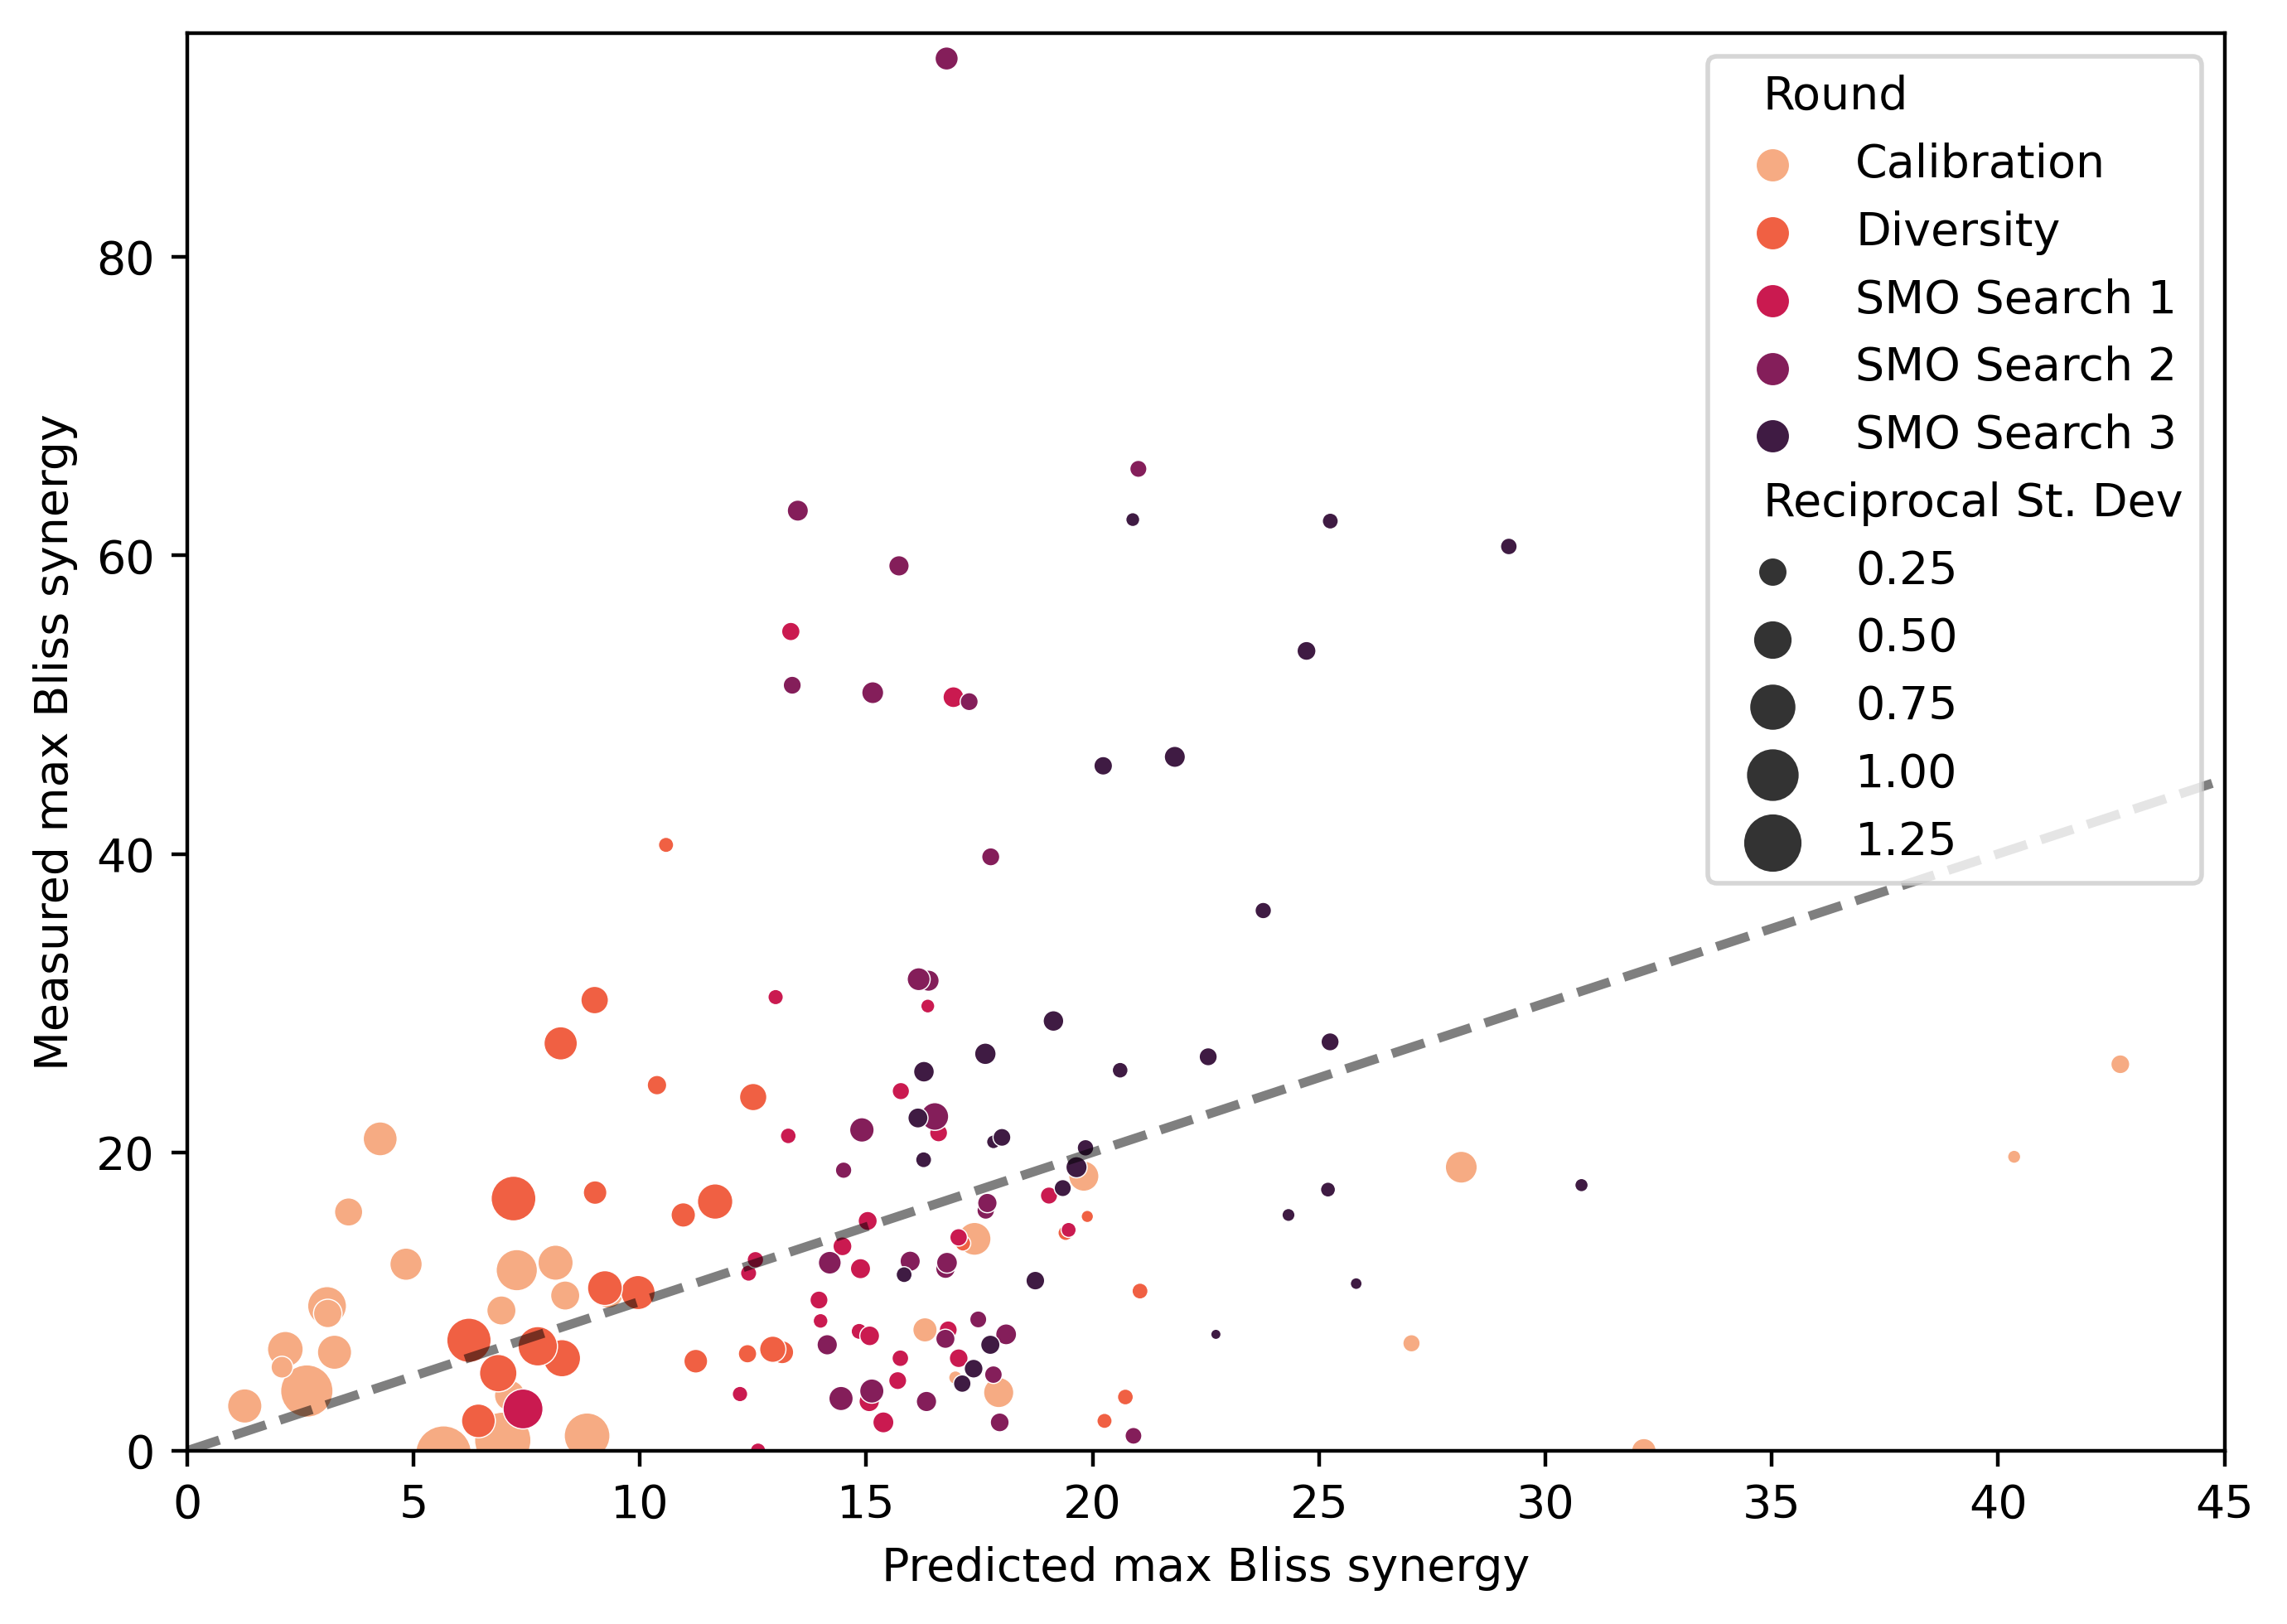

<Figure size 432x288 with 0 Axes>

In [15]:
figure(figsize=(7, 5), dpi=400)
g = sns.scatterplot(data=all_rounds, 
                    x = 'preds_mean', 
                    y = 'synergy_bliss_max', 
                    hue= 'Round', 
                    size = 'Reciprocal St. Dev', 
                    sizes=(5, 150),
                    palette = sns.color_palette("rocket_r", n_colors=5)
                   )
#g.set_xticks()
g.set_ylim(0, 95)
g.set_xlim(0, 45)
g.set(ylabel='Measured max Bliss synergy')
g.set(xlabel='Predicted max Bliss synergy')
plt.plot([0, 45], [0, 45], linewidth=2, color = 'k', linestyle = '--', alpha = 0.5 )
#plt.legend(labels=["Compounds","Combos"])

fig = g.get_figure()
fig.tight_layout()

plt.savefig("additional_figures/max_Bliss_predicted_vs_actual.png", dpi=400)
plt.show()
plt.clf()

In [16]:
# Figure 4A data frame
ev = list()
r2 = list()
corr = list()
rounds = [1, 2, 3, 4, 5]

for r in rounds:
    round_data = all_rounds[all_rounds['round'] == r]
    ev_round = explained_variance_score(y_true=round_data['synergy_bliss_max'], y_pred=round_data['preds_mean'], sample_weight=1/( round_data['preds_std'] ) )
    r2_round = r2_score(y_true=round_data['synergy_bliss_max'], y_pred=round_data['preds_mean'], sample_weight=1/( round_data['preds_std'] ) )
    corr_round = w_corr( round_data['synergy_bliss_max'], round_data['preds_mean'],  1/( round_data['preds_std'] ) )
    ev.append(ev_round)
    r2.append(r2_round)
    corr.append(corr_round)
    
metrics = pd.DataFrame({'Round': rounds,
                        'Explained variance': ev,
                        'r2': r2, 
                        'Correlation': corr})

metrics

,Round,Explained variance,r2,Correlation
0,1,-0.687013,-0.718994,0.382260
1,2,-0.153344,-0.209811,0.023437
2,3,0.092973,0.089225,0.315678
3,4,-0.011660,-0.158557,-0.045775
4,5,0.168606,0.033608,0.480339


In [17]:

metrics['Round_name'] = metrics['Round'].apply(get_round_name)

metrics


,Round,Explained variance,r2,Correlation,Round_name
0,1,-0.687013,-0.718994,0.382260,Calibration
1,2,-0.153344,-0.209811,0.023437,Diversity
2,3,0.092973,0.089225,0.315678,SMO Search 1
3,4,-0.011660,-0.158557,-0.045775,SMO Search 2
4,5,0.168606,0.033608,0.480339,SMO Search 3


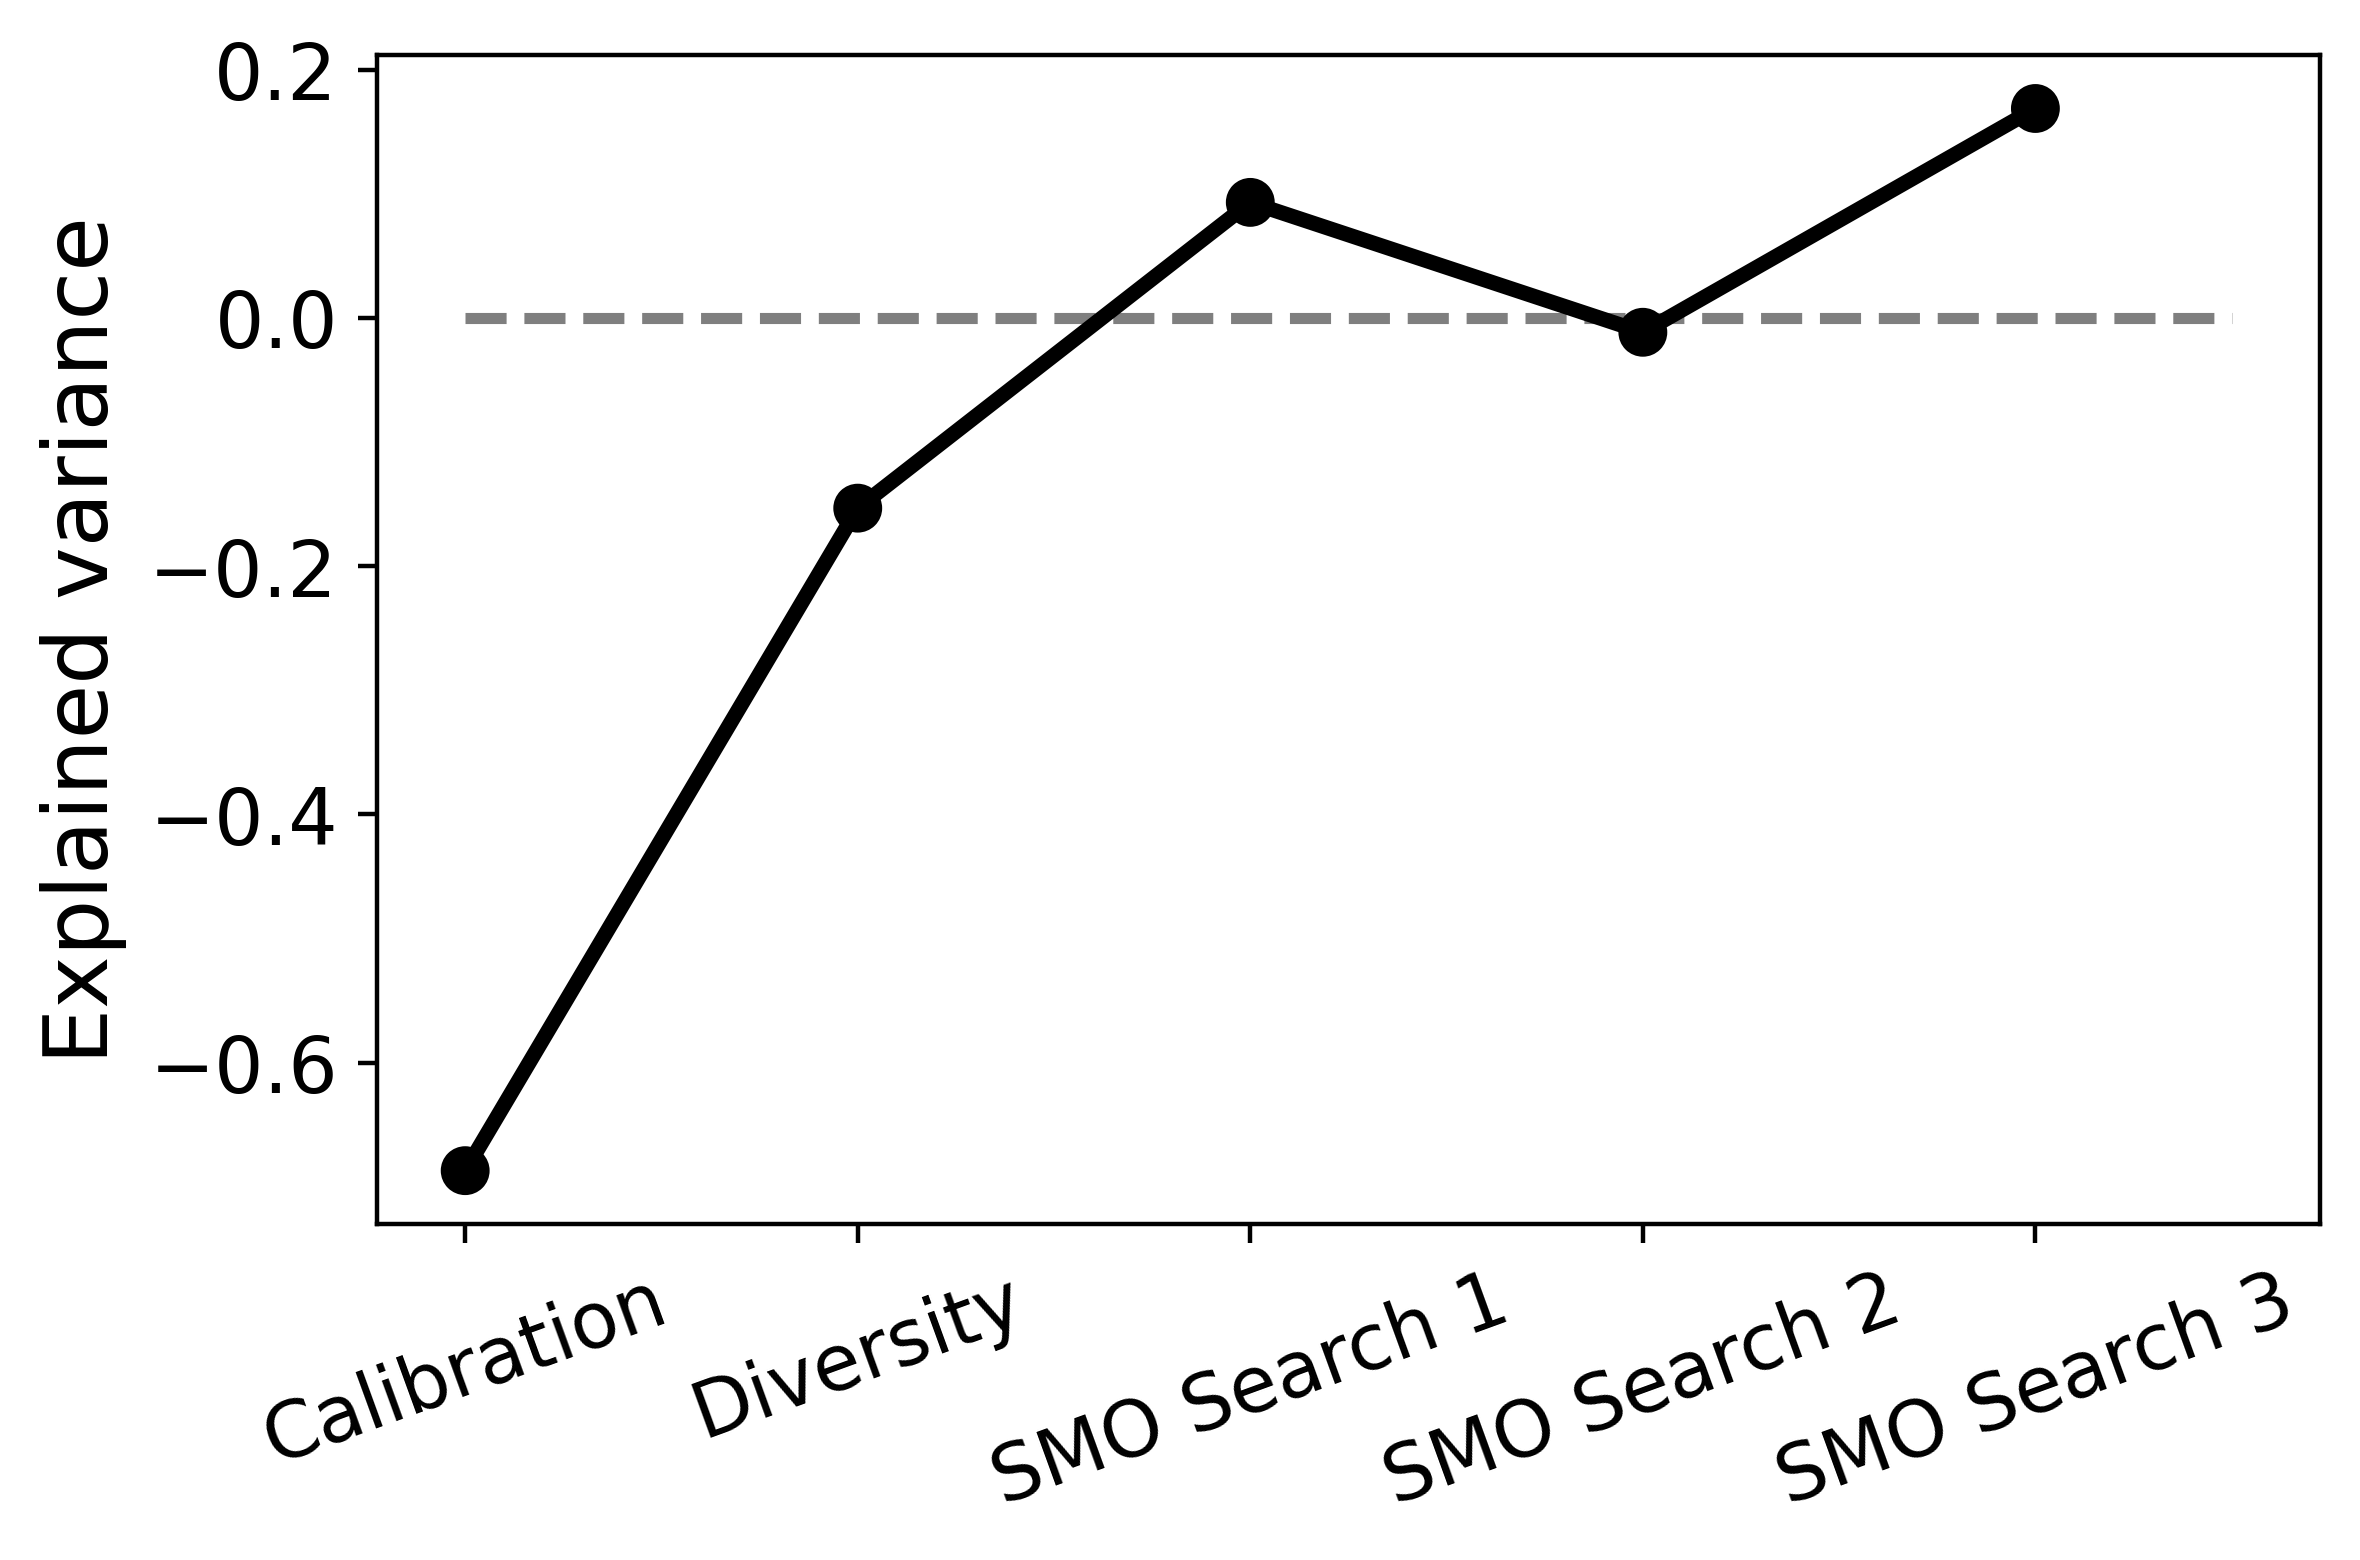

<Figure size 432x288 with 0 Axes>

In [18]:
figure(figsize=(6, 4), dpi=400)
g = sns.pointplot(data=metrics, x = 'Round_name', y = 'Explained variance', color="0")

plt.plot([0, 4.5], [0, 0], linewidth=2, color = 'k', linestyle = '--', alpha = 0.5 )


plt.xlabel(None)
plt.ylabel("Explained variance", fontsize = 16)

g.set_xticklabels(g.get_xticklabels(), rotation = 20)

g.tick_params(axis='x', labelsize=14)
g.tick_params(axis='y', labelsize=14)

fig = g.get_figure()
fig.tight_layout()

plt.savefig("additional_figures/explained_variance.png", dpi=400)
plt.show()
plt.clf()



In [19]:
all_rounds.max()

drug_col_relation_id    RE-MOL-0001518809
drug_row_relation_id    RE-MOL-0000968222
synergy_bliss_max                    93.3
cell_line_name                       MCF7
preds_mean                       42.69788
preds_std                       14.314305
score                           50.447298
round                                   5
preds_var                      204.899319
reverse_preds_std                1.427428
Reciprocal St. Dev               1.427428
Round                        SMO Search 3
dtype: object

In [20]:
sns.scatterplot(data=all_rounds, x = 'MAE', y = 'preds_std', hue= 'round')

ValueError: Could not interpret value `MAE` for parameter `x`

In [ ]:
all_rounds_summary = all_rounds.groupby(['round']).mean()
all_rounds_summary.reset_index(inplace=True)

In [ ]:
all_rounds_summary

In [ ]:
sns.scatterplot(data=all_rounds_summary, x = 'MAE', y = 'preds_std', hue= 'round')

In [ ]:
plot_data

## Figure 4A

In [ ]:
# Figure 4B denstiy plot
sns.displot(data=plot_data, x='synergy_bliss_max', hue='round_name', kind="kde", palette='muted')

In [ ]:
sns.color_palette("rocket_r", n_colors=5)

In [ ]:
# Figure 4B box plot
figure(figsize=(6, 4), dpi=400)
ax = sns.boxplot(data=plot_data, y='synergy_bliss_max', x='round_name' , palette = sns.color_palette("rocket_r", n_colors=5) )

plt.xlabel(None)
plt.ylabel("Max Bliss", fontsize = 16)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
# ax.set_yticklabels(ax.get_yticklabels() )

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

fig = ax.get_figure()
fig.tight_layout()

#plt.savefig("final_figures/boxplot_max_Bliss_synergy.png", dpi=400)
plt.show()
plt.clf()


In [ ]:
ax.get_yticklabels()

In [ ]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    label = ax.get_ylabel()
    label = textwrap.fill(label, width=width,
                          break_long_words=break_long_words)
    #text = label.get_text()
        #labels.append(textwrap.fill(text, width=width,
        #              break_long_words=break_long_words))
    ax.set_ylabel(label, rotation=90)

In [ ]:
# Figure 4B violin plot
figure(figsize=(3, 2), dpi=300)
ax = sns.violinplot(data=plot_data, y='synergy_bliss_max', x='round_name', palette='muted')
plt.ylabel("Max Bliss")
#wrap_labels(ax, 15)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.xlabel(None)

In [ ]:
fig = ax.get_figure()
fig.tight_layout()
#fig.savefig('Figure7B_violinplot_small.png', dpi=300)

In [ ]:
# Figure 4B denstiy plot
figure(figsize=(7, 5), dpi=400)
ax = sns.ecdfplot(data=plot_data.rename(columns={'round_name': 'Legend'}), x='synergy_bliss_max', hue='Legend', palette = sns.color_palette("rocket_r", n_colors=5) )
ax.set(xlabel='Max Bliss', ylabel='Cumulative density')

#plt.ylabel("Cumulative density")

#plt.savefig("final_figures/ECDF_max_Bliss_synergy.png", dpi=400)
plt.show()
plt.clf()
